# Regression

##10/23: Nonlinear Least Squares in Numpy

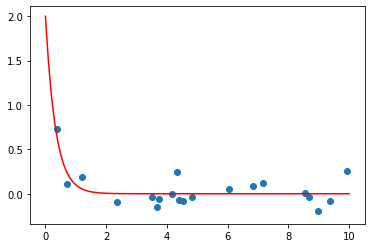

In [0]:
a0 = 2
b0 = 3

n = 20
import numpy as np
from numpy.random import rand, randn
x = 10*rand(n)

def signal(a,b,x): 
  return a*np.exp(-b*x)

noiseLevel = 0.1
y = signal(a0, b0, x) + noiseLevel*randn(n)

xGrid = np.linspace(0,10,100)

import matplotlib.pyplot as plt
plt.plot(xGrid,signal(a0,b0,xGrid), 'r')
plt.scatter(x, y)

In [0]:
aInit = 1
bInit = 1

a = aInit
b = bInit

Iter = 100

stepLength = 0.01

for t in range(Iter):
  yPred = signal(a,b,x)
  loss = np.sum((yPred - y)**2)
  partL_partyPred = 2*(yPred -y)
  partyPred_partA = np.exp(-b*x)
  partyPred_partB = -x*yPred
  partL_partA = partL_partyPred.dot(partyPred_partA)
  partL_partB = partL_partyPred.dot(partyPred_partB)
  a = a - stepLength*partL_partA
  b = b - stepLength*partL_partB
  print('Numpy Iteration ', t, ' Loss ', loss)

Numpy Iteration  0  Loss  0.4554826643409915
Numpy Iteration  1  Loss  0.45158893402366757
Numpy Iteration  2  Loss  0.4479213417024597
Numpy Iteration  3  Loss  0.4444635570296046
Numpy Iteration  4  Loss  0.44120068599975637
Numpy Iteration  5  Loss  0.4381191193929884
Numpy Iteration  6  Loss  0.43520639998878546
Numpy Iteration  7  Loss  0.43245110588099006
Numpy Iteration  8  Loss  0.4298427476517188
Numpy Iteration  9  Loss  0.4273716775141448
Numpy Iteration  10  Loss  0.425029008824635
Numpy Iteration  11  Loss  0.42280654460571354
Numpy Iteration  12  Loss  0.4206967139219965
Numpy Iteration  13  Loss  0.4186925151189927
Numpy Iteration  14  Loss  0.41678746507542036
Numpy Iteration  15  Loss  0.4149755537382171
Numpy Iteration  16  Loss  0.413251203309565
Numpy Iteration  17  Loss  0.41160923154015505
Numpy Iteration  18  Loss  0.41004481865511255
Numpy Iteration  19  Loss  0.40855347750058624
Numpy Iteration  20  Loss  0.4071310265516886
Numpy Iteration  21  Loss  0.40577356

In [0]:
import torch
aTS = torch.DoubleTensor(aInit)
aTS.requires_grad_(True)
bTS = torch.DoubleTensor(bInit)
bTS.requires_grad_(True)
xTS = torch.from_numpy(x)
yTS = torch.from_numpy(y)

for t in range(Iter):
  yPredTS = aTS*torch.exp(-bTS*xTS)
  lossTS = torch.sum(torch.pow(yPredTS - yTS, 2))
  lossTS.backward()
  aTS = aTS - stepLengthTS*partL_partA
  a = b - steplengthTS*partL_partB
  print('Numpy Iteration ', t, ' Loss = ', loss)

##10/28: Nonlinear Least Squares with PyTorch

In [0]:
aTS = torch.DoubleTensor([aInit]).to(device)
aTS.requires_grad_(True)
bTS = torch.DoubleTensor([bInit]).to(device)
bTS.requires_grad_(True)

lossHistoryTorch = []
for epoch in range(nEpochs):
  yPredTS = aTS*torch.exp(-bTS*xTrainTS)
  # How wrong is our model? That's the error!
  error = yTrainTS - yPredTS
  # It is a regression, so it computes mean squared error (MSE)
  loss = (error**2).mean()
  # loss = (torch.abs(error)).mean()
  print('Pytorch run epoch ', epoch, ', loss = ', loss)
  lossHistoryTorch.append(loss)
  
  loss.backward()
  
  with torch.no_grad():
    aTS -= lr*aTSGrad
    bTS -= lr*bTSGrad
  
  aTS.grad.zero_() 
  bTS.grad.zero_()

# Bayesian Statistical Inference

## 11/18: Gibbs Sampler

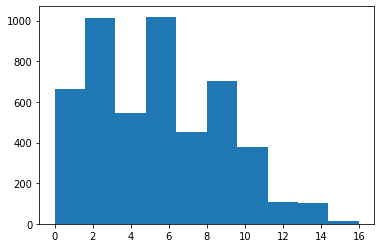

In [0]:
import numpy as np
import matplotlib.pyplot as plt

n = 16
alpha = 2
beta = 4

numIter = 5000

# initial value
y = 0.5
xs = []
ys = [y]

for i in range(numIter):
  x = np.random.binomial(n, y)
  xs.append(x)
  y = np.random.beta(x+alpha, n-x+beta)
  ys.append(y)

# empirical marginal distribution of x
plt.hist(xs)
plt.show()

In [0]:
# uncertainty quantification

np.mean(xs)

np.std(xs)

3.3309419148343014

## 11/20: RNG

### Inverse CDF

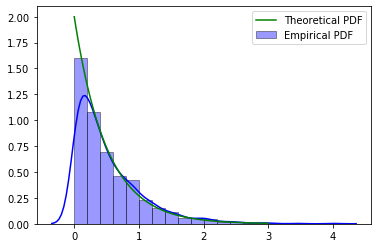

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n = 1000
U = np.random.rand(n)

lamb = 2
X = -np.log(1-U)/lamb # ICDF

PDF_EXP = lambda x: lamb*np.exp(-lamb*x)

sns.distplot(X, hist=True, kde=True, # kde = kernel density estimation
            bins=20, color='blue',
            hist_kws={'edgecolor':'black'},
             label= 'Empirical PDF')

xgrid = np.linspace(0, 3, 100)
ygrid = PDF_EXP(xgrid)
plt.plot(xgrid, ygrid, color='green', label='Theoretical PDF')
plt.legend()
plt.show()

### Acceptance-Rejection Algorithm

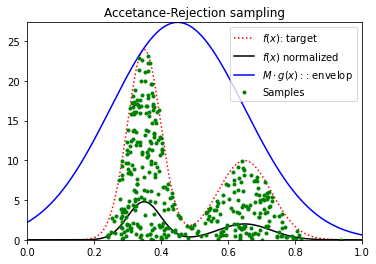

In [0]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np


# Number of samples to draw from the probability estimation function
N = 1000

# The target probability density function f(x), maybe not normalized
# Two mixture of Normal that are normalized
# = lambda x: 0.6 * norm.pdf(x, 0.35, 0.05) + 0.4 * norm.pdf(x, 0.65, 0.08)
# Two mixture of Normal that are NOT normalized
target = lambda x: 3 * norm.pdf(x, 0.35, 0.05) + 2 * norm.pdf(x, 0.65, 0.08)

# The target probability density function, normalized
targetPDF = lambda x: 0.6 * norm.pdf(x, 0.35, 0.05) + 0.4 * norm.pdf(x, 0.65, 0.08) 

# The proposal probability density function g(x)
proposal = lambda x: norm.pdf(x, 0.45, 0.2)

# A number of samples, drawn from the approximated probability density function
x_samples = np.random.normal(0.45, 0.2, (N,))

# A number of samples in the interval [0, 1]
u = np.random.uniform(0, 1, (N, ))

# The multiplication constant to make M * g(x)>= f(x)
x = np.linspace(0,1,500)
M = max(target(x) / proposal(x))

# Now examine all the samples and only use the samples found by rejection sampling
samples = [(x_samples[i], u[i] * M * proposal(x_samples[i])) for i in range(N) if u[i] < target(x_samples[i]) / (M * proposal(x_samples[i]))]

# Make the plots
fig, ax = plt.subplots(1, 1)

# The target function
ax.plot(x, target(x), 'r:', label='$f(x)$: target')

# The target probability density function
ax.plot(x, targetPDF(x), 'k-', label='$f(x)$ normalized')

# The approximated probability density function
ax.plot(x, M * proposal(x), 'b-', label='$M \cdot g(x):$: envelop')

# The samples found by rejection sampling
ax.plot([sample[0] for sample in samples], [sample[1] for sample in samples], 'g.', label='Samples')

# Set the window size
axes = plt.gca()
axes.set_xlim([0, 1])
axes.set_ylim([0, max(M*proposal(x))])

# Show the legend
plt.legend()

# Set the title
plt.title('Accetance-Rejection sampling')

# Show the plots
plt.show()

### Metropolis-Hastings Algorithm

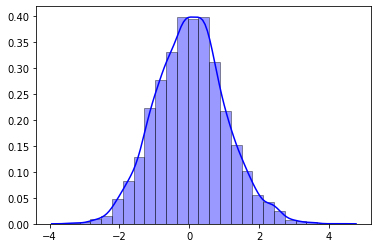

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n = 10000
xs = np.zeros(n)
x = 0

for i in range(n):
  p = np.random.uniform(x-1, x+1) # proposal distribution
  a = np.exp(-(p**2-x**2)/2) # Metropolis-Hastings ratio
  u = np.random.rand()
  if u < a:
    x = p
  xs[i] = x

sns.distplot(xs, hist=True, kde=True, # kde = kernel density estimation
            bins=25, color='blue',
            hist_kws={'edgecolor':'black'},
             label= 'Histogram of the samples')

plt.title('PDF, KDE, and Histogram of Random Numbers')
plt.xlabel('x')
plt.ylabel('Density')

xp = np.linspace()


### MCMC + Mixture Distribution

100


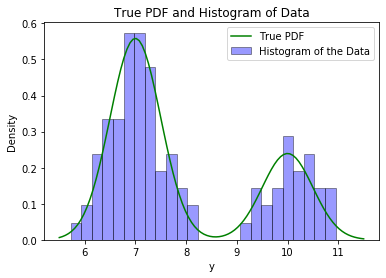

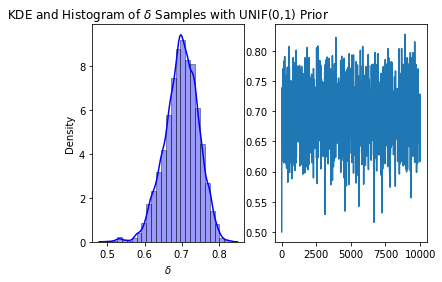

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

np.random.seed(0)

n = 100

mu1 = 7
sigma1 = 0.5
mu2 = 10
sigma2 = 0.5

delta_true = 0.7

n1 = int(n*delta_true)

y = np.hstack((sigma1*np.random.randn(n1) + mu1, sigma2*np.random.randn(n-n1) + mu2))
print(len(y))

def mix_normal(y, delta):
  return delta*stats.norm.pdf(y, mu1, sigma1) + (1-delta)*stats.norm.pdf(y, mu2, sigma2)

def likelihood(delta):
  return np.prod(mix_normal(y, delta))

ax0 = sns.distplot(y, hist=True, kde=False,
                   bins=25, color = 'blue',
                   hist_kws = {'edgecolor':'black'},
                   norm_hist = True,
                   axlabel = 'y',
                   label = 'Histogram of the Data')

ygrid = np.linspace(mu1-3*sigma1, mu2+3*sigma2, 100)
ax0.plot(ygrid, mix_normal(ygrid, delta_true), color='Green', label='True PDF')
ax0.legend(loc='upper right')
ax0.set_title('True PDF and Histogram of Data')
ax0.set_ylabel('Density')

m = 10000
deltas = np.zeros(m)
delta = 0.5
for i in range(m):
  # random number generation from the proposal distribution
  delta_star = np.random.rand()
  # compute the Metropolis-Hastings Acceptance Ratio
  MH_ratio = likelihood(delta_star)/likelihood(delta)
  # accept the delta_star with probability MH_ratio
  r = np.random.rand()
  if r < MH_ratio:
    delta = delta_star
  deltas[i] = delta

fig, axes = plt.subplots(1, 2)

ax_unif = sns.distplot(deltas, hist=True, kde=True,
             bins=25, color = 'blue',
             hist_kws={'edgecolor': 'black'},
             axlabel = r'$\delta$',
             label = 'Histogram of the samples',
             ax=axes[0])

ax_unif.set_title('KDE and Histogram of $\delta$ Samples with UNIF(0,1) Prior')
ax_unif.set_ylabel('Density')

axes[1].plot(deltas)

# If the trace plot looks like random noise, the Markov Chain is mixing well
# If the trace plot is constant, the Markov Chain is not mixing well (delta is not being updated)